<a id='back_to_top'></a>
# Treasury Yield Curve (GCA Version)
---
* [Section 1](#section_1): Sample code to visualize interest rates
* [Section 2](#section_2): Create function to visualize interest rates

In [1]:
import pandas as pd

pd.set_option("display.max_columns", 999)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md

import seaborn as sns

print('Seaborn version: ', sns.__version__)

Seaborn version:  0.11.1


In [2]:
import matplotlib.dates as md
import matplotlib.dates as mdates

<a id='section_1'></a>
### Section 1: Sample code to visualize interest rates 
[back to top](#back_to_top)

In [3]:
%%time

# Scrape treasury yield curve
str_year = '2018'
str_yield = f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={str_year}'

df_yield_curve = pd.read_html(str_yield)[0]

CPU times: user 512 ms, sys: 60 ms, total: 572 ms
Wall time: 1.42 s


In [4]:
# convert date from str
df_yield_curve['Date'] = pd.to_datetime(df_yield_curve['Date'], format = '%m/%d/%Y')

print(f'Dataframe shape: {df_yield_curve.shape} \n')
print(f'Dataframe columns: {df_yield_curve.columns} \n')

df_yield_curve.head()

Dataframe shape: (249, 20) 

Dataframe columns: Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr',
       '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object') 



,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81
1,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78
2,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.28,NaN,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79
3,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27,NaN,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81
4,2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30,NaN,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81


In [5]:
# select subset of columns
ls_cols_select = ['Date', '2 Yr', '5 Yr', '10 Yr', '30 Yr']

# create new dataframe with select columns
df_yield_curve_select = df_yield_curve[ls_cols_select]
df_yield_curve_select = df_yield_curve_select.set_index('Date')

print(f'Dataframe shape: {df_yield_curve_select.shape} \n')
print(f'Dataframe columns: {df_yield_curve_select.columns} \n')

df_yield_curve_select.head()

Dataframe shape: (249, 4) 

Dataframe columns: Index(['2 Yr', '5 Yr', '10 Yr', '30 Yr'], dtype='object') 



,2 Yr,5 Yr,10 Yr,30 Yr
Date,,,,
2018-01-02,1.92,2.25,2.46,2.81
2018-01-03,1.94,2.25,2.44,2.78
2018-01-04,1.96,2.27,2.46,2.79
2018-01-05,1.96,2.29,2.47,2.81
2018-01-08,1.96,2.29,2.49,2.81


/home/peter/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


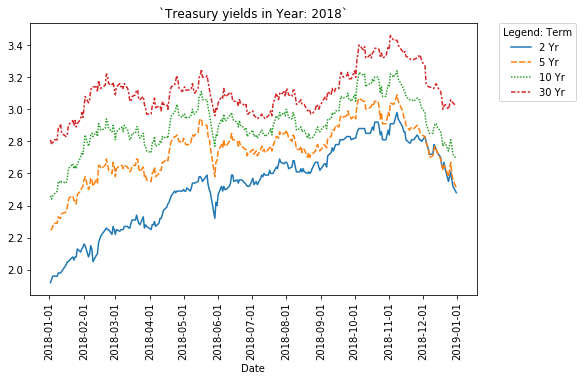

In [6]:
# ==================================================================================================
# Line plot, including adjusting x-axis density
# https://stackoverflow.com/questions/63218645/lowering-the-x-axis-value-density-for-dates-on-a-seaborn-line-plot-updated
# Matplotlib x-axis density. https://stackoverflow.com/questions/13052844/matplotlib-how-to-decrease-density-of-tick-labels-in-subplots
# Matplotlib x-axis formatting. https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib
# ==================================================================================================

data=df_yield_curve_select


fig, ax = plt.subplots(figsize = (8, 5))

sns.lineplot(ax = ax, data=data)

# set x-axis formatting
interval=1
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday = interval))


# put a title
plt.title(f"`Treasury yields in Year: {str_year}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: Term", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<a id='section_2'></a>
### Section 2: Create function to visualize interest rates
[back to top](#back_to_top)

In [7]:
def visualize_year_rates(str_year):
    '''
    Visualize Treasury interest rates from a single year.
    '''
    
    # Scrape treasury yield curve
    str_yield = f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={str_year}'
    df_yield_curve = pd.read_html(str_yield)[0]
    
    # convert date from str
    df_yield_curve['Date'] = pd.to_datetime(df_yield_curve['Date'], format = '%m/%d/%Y')
    
    # select subset of columns
    ls_cols_select = ['Date', '2 Yr', '5 Yr', '10 Yr', '30 Yr']

    # create new dataframe with select columns
    df_yield_curve_select = df_yield_curve[ls_cols_select]
    df_yield_curve_select = df_yield_curve_select.set_index('Date')
    
    print(str_year)
    print(df_yield_curve.shape)
    print(df_yield_curve_select.shape)
    
    # ==================================================================================================
    # Line plot, including adjusting x-axis density
    # https://stackoverflow.com/questions/63218645/lowering-the-x-axis-value-density-for-dates-on-a-seaborn-line-plot-updated
    # ==================================================================================================
    
    try:
        
        fig, ax = plt.subplots(figsize = (8, 5))

        sns.lineplot(ax = ax, data=df_yield_curve_select)

        # set x-axis formatting
        interval=1
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday = interval))

        # put a title
        plt.title(f"Treasury Yields in Year: `{str_year}`")

        # Rotates X-Axis Ticks by 90-degrees
        plt.xticks(rotation = 90) 

        # Put the legend out of the figure
        plt.legend(title=f"Legend: Term", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.show()
        print()
        
    except:
        print(f'Error visualizing year: {str_year}')
    
    return df_yield_curve

2005
(250, 20)
(250, 4)


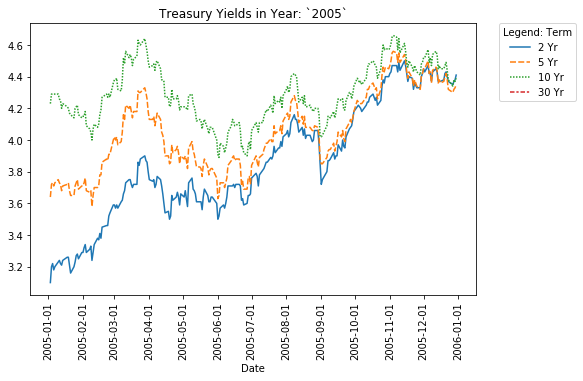


2006
(250, 20)
(250, 4)


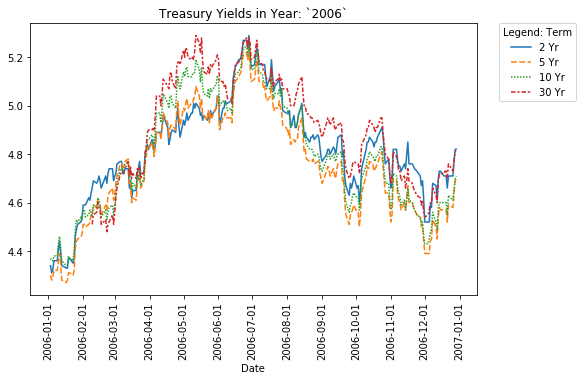


2007
(251, 20)
(251, 4)


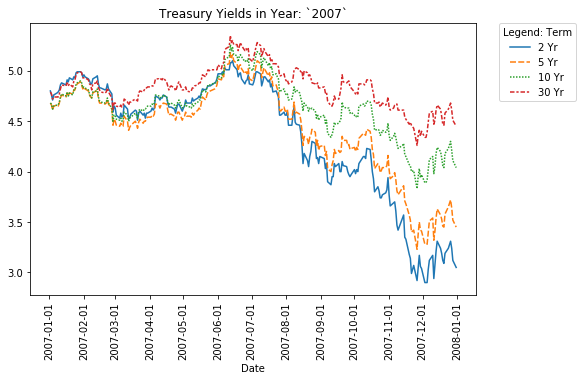


2008
(251, 20)
(251, 4)


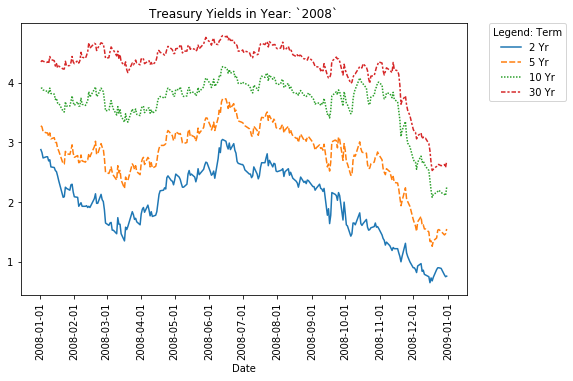


2009
(250, 20)
(250, 4)


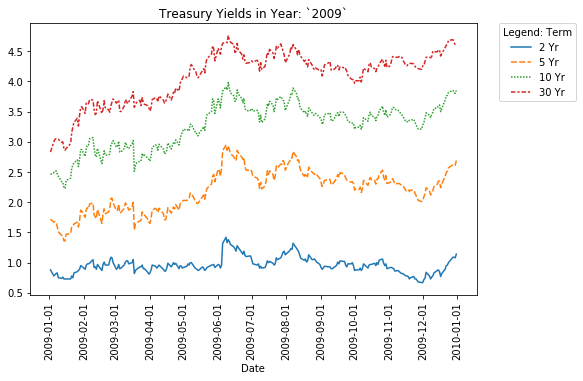

In [14]:
_ = visualize_year_rates('2005')
_ = visualize_year_rates('2006')
_ = visualize_year_rates('2007')
_ = visualize_year_rates('2008')
_ = visualize_year_rates('2009')

2018
(249, 20)
(249, 4)


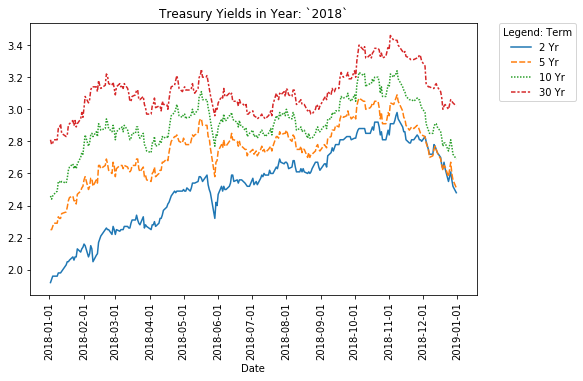


2019
(250, 20)
(250, 4)


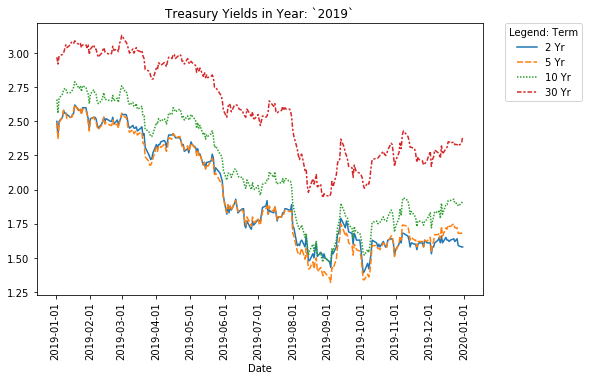


2020
(251, 20)
(251, 4)


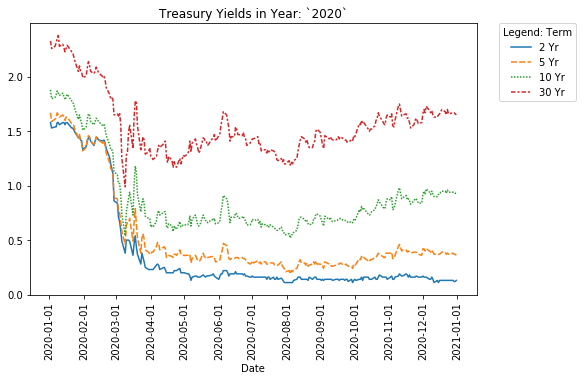


2021
(251, 20)
(251, 4)


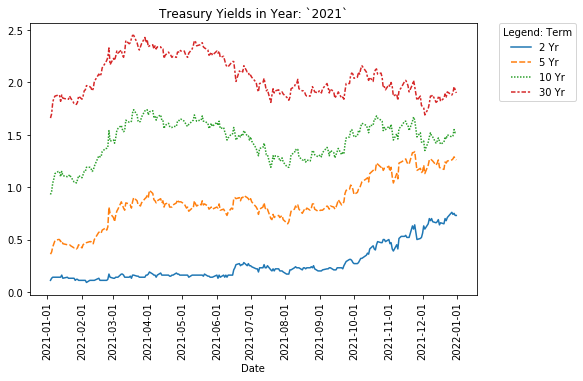


2022
(154, 20)
(154, 4)


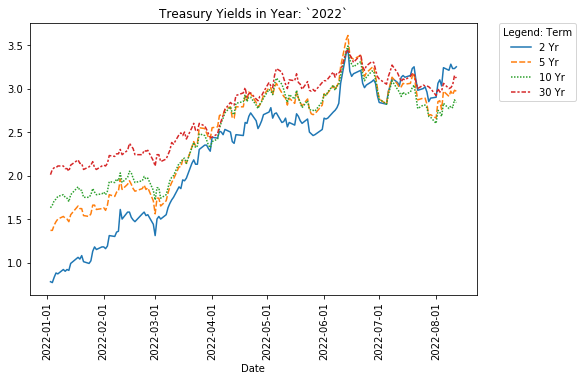

In [8]:
_ = visualize_year_rates('2018')
_ = visualize_year_rates('2019')
_ = visualize_year_rates('2020')
_ = visualize_year_rates('2021')
_ = visualize_year_rates('2022')

2022
(154, 20)
(154, 4)


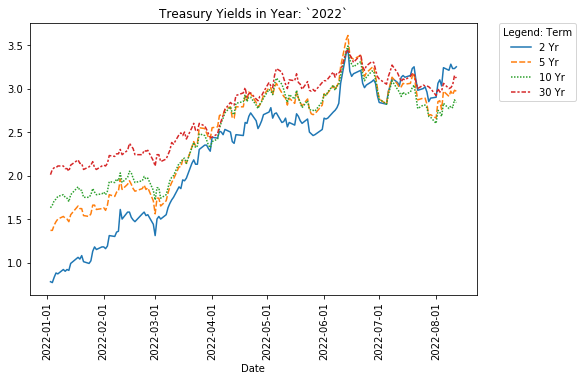

In [9]:
df_2022 = visualize_year_rates('2022')

In [10]:
df_2022.tail()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
149,2022-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.23,2.43,2.65,3.15,3.30,3.21,3.14,2.91,2.85,2.77,3.22,3.00
150,2022-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.23,2.43,2.67,3.16,3.33,3.28,3.20,2.97,2.89,2.80,3.24,3.01
151,2022-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.24,2.43,2.65,3.13,3.26,3.23,3.13,2.93,2.86,2.78,3.27,3.04
152,2022-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.24,2.51,2.62,3.08,3.25,3.23,3.16,2.98,2.94,2.87,3.38,3.15
153,2022-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.23,2.50,2.63,3.13,3.26,3.25,3.18,2.97,2.92,2.84,3.34,3.12


In [11]:
df_2022.iloc[-1, -12:]

1 Mo     2.23
2 Mo      2.5
3 Mo     2.63
6 Mo     3.13
1 Yr     3.26
2 Yr     3.25
3 Yr     3.18
5 Yr     2.97
7 Yr     2.92
10 Yr    2.84
20 Yr    3.34
30 Yr    3.12
Name: 153, dtype: object

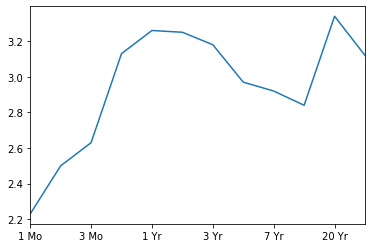

In [12]:
df_2022.iloc[-1, -12:].plot()

-10


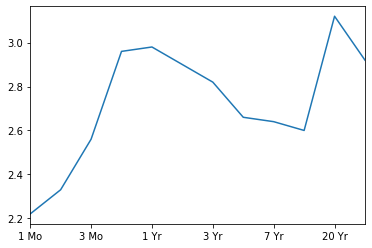


-9


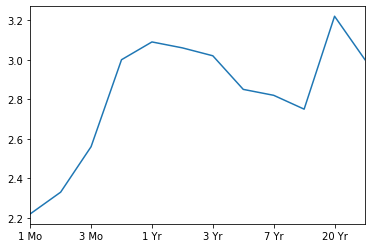


-8


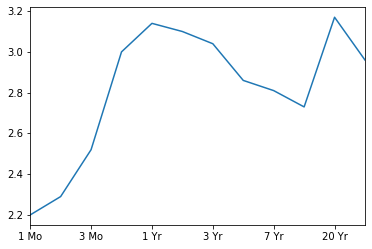


-7


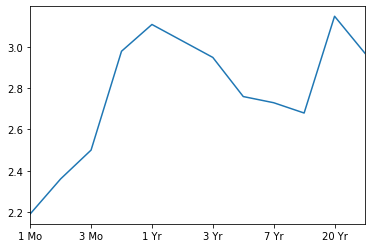


-6


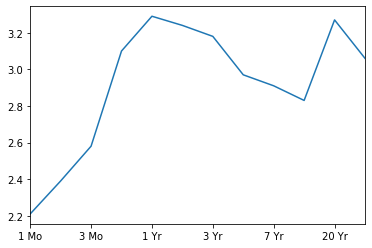


-5


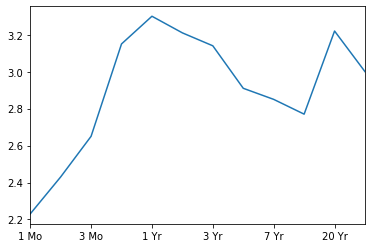


-4


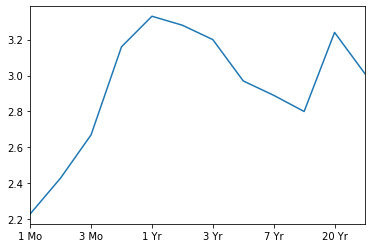


-3


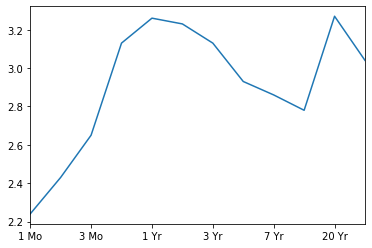


-2


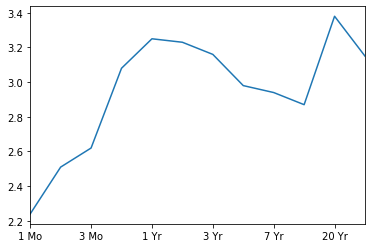


-1


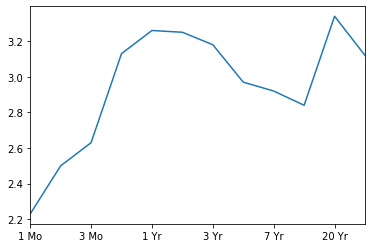

In [13]:
for each_day in [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]:
    print(each_day)
    df_2022.iloc[each_day, -12:].plot()
    plt.show()
    print()